<a href="https://colab.research.google.com/github/attaullah220/Alphabet_App/blob/master/watersamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Data Cleaning
#Loading the data set
watersample = pd.read_csv('watersamples.csv')
watersample

,sediments,turbidity,tds,ph,chloride,calcium,arsenic,magnesium,coliform,ecoli,output
0,1,0.24,18.75,7.43,3.19,2.40,0.000,1.34,1,1,0
1,0,0.04,176.60,7.47,37.94,27.73,0.100,11.47,0,0,0
2,0,0.00,204.00,8.00,31.99,7.45,0.010,7.53,0,0,1
3,0,0.02,126.00,7.70,43.08,24.04,0.000,6.00,0,0,1
4,0,0.03,194.20,7.80,27.69,16.91,0.010,12.14,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
254,0,0.05,180.00,6.84,54.30,28.21,0.000,13.10,0,0,1
255,0,0.04,137.40,6.83,29.07,21.16,0.010,5.95,0,0,1
256,0,0.03,174.40,8.27,3.84,8.73,0.000,7.48,0,0,1
257,0,0.05,109.50,7.48,34.09,18.19,0.005,5.71,0,0,1


In [ ]:
#Checking data types
watersample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sediments  259 non-null    int64  
 1   turbidity  259 non-null    float64
 2   tds        259 non-null    float64
 3   ph         259 non-null    float64
 4   chloride   259 non-null    float64
 5   calcium    259 non-null    float64
 6   arsenic    259 non-null    float64
 7   magnesium  259 non-null    float64
 8   coliform   259 non-null    int64  
 9   ecoli      259 non-null    int64  
 10  output     259 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 22.4 KB


In [ ]:
pd.isnull(watersample).sum()

sediments    0
turbidity    0
tds          0
ph           0
chloride     0
calcium      0
arsenic      0
magnesium    0
coliform     0
ecoli        0
output       0
dtype: int64

In [ ]:
watersample.describe()

,sediments,turbidity,tds,ph,chloride,calcium,arsenic,magnesium,coliform,ecoli,output
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,0.084942,0.088880,181.417954,7.275328,44.769807,28.645714,0.597394,8.935792,0.200772,0.077220,0.633205
std,0.279335,0.353939,64.651046,0.600618,26.696970,14.365791,9.506556,5.864440,0.401354,0.267457,0.482863
min,0.000000,0.000000,8.000000,2.350000,0.090000,0.560000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.020000,149.410000,6.990000,23.540000,19.830000,0.000000,5.375000,0.000000,0.000000,0.000000
50%,0.000000,0.040000,174.400000,7.380000,44.980000,26.850000,0.000000,8.160000,0.000000,0.000000,1.000000
75%,0.000000,0.070000,204.950000,7.630000,60.280000,33.820000,0.005000,11.155000,0.000000,0.000000,1.000000
max,1.000000,4.000000,483.100000,8.300000,154.360000,99.900000,153.000000,33.120000,1.000000,1.000000,1.000000


In [ ]:
#Handling missing values
watersample.isna().sum()

sediments    0
turbidity    0
tds          0
ph           0
chloride     0
calcium      0
arsenic      0
magnesium    0
coliform     0
ecoli        0
output       0
dtype: int64

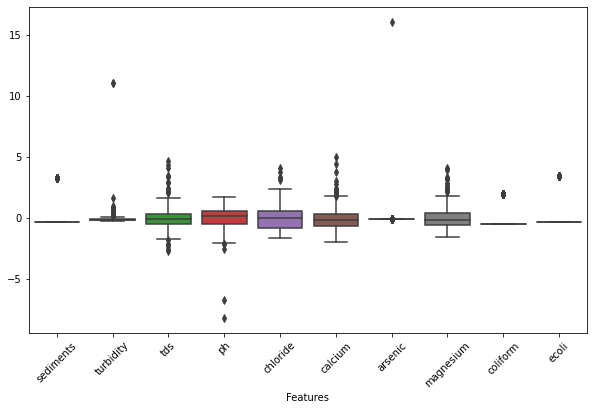

In [ ]:
plt.figure(figsize=[10,6])
scaler=StandardScaler()
scaled_df=scaler.fit_transform(watersample.drop(columns=["output"]))
sns.boxplot(data=scaled_df,orient="v")
plt.xticks(np.arange(10),watersample.columns[0:-1],rotation=45)
plt.xlabel('Features')
plt.show()

In [ ]:
#Removing duplicates
watersample.duplicated().sum()

4

In [ ]:
#Removing outliers
df_copy = watersample.copy()
cols_to_check = watersample.columns[0:-1]

#Define a function to identify outliers
def detect_outlier_iqr(data):
  quartile_1, quartile_3 = np.percentile(data, [25, 75])
  iqr = quartile_3 - quartile_1
  lower_bound = quartile_1 - (iqr * 1.5)
  upper_bound = quartile_3 + (iqr * 1.5)

  outliers = [x for x in data if x <lower_bound or x > upper_bound]
  return outliers

#Create a new column to store the number of outliers in each row
df_copy['outlier_count'] = df_copy[cols_to_check].apply(lambda row: len(detect_outlier_iqr(row)), axis = 1)

#Remove rows where the number of outliers is greater than 2
df_copy = df_copy[df_copy['outlier_count'] <= 2]

#Drop the outlier_count column
df_copy = df_copy.drop(columns=['outlier_count'])

In [ ]:
print(str(watersample.shape[0] - df_copy.shape[0]) + " rows had been removed")

0 rows had been removed


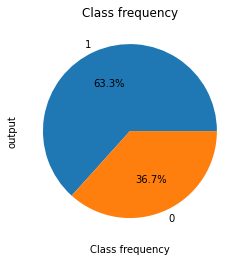

In [ ]:
#Data Visualization
watersample["output"].value_counts(normalize = True).plot.pie(autopct = '%.1f%%')
plt.xlabel("Class frequency")
_ = plt.title("Class frequency")

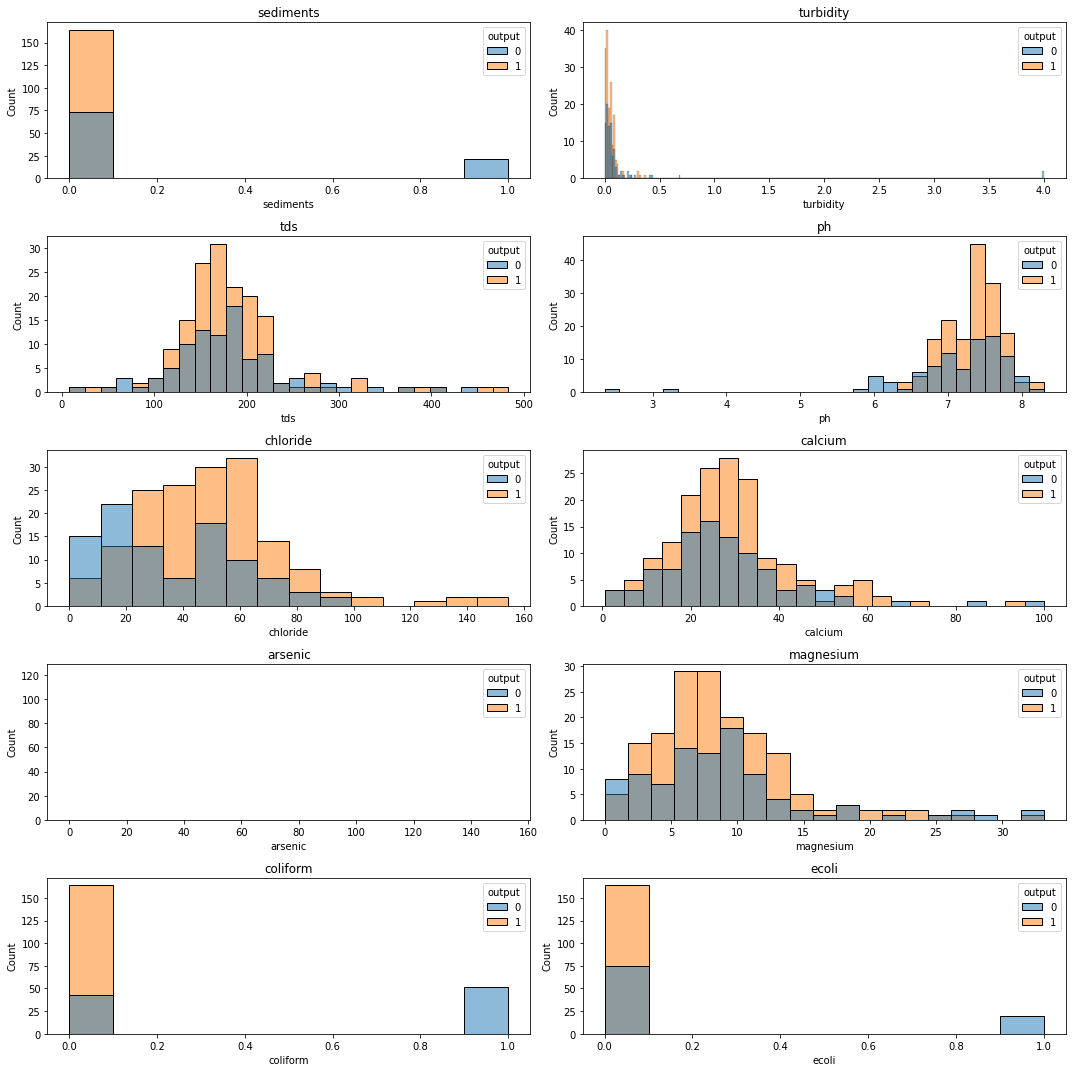

In [ ]:
fig, ax = plt.subplots(5, 2, figsize = (15, 15))

#Plot histograms for each feature in each subplot
features = watersample.columns[0:-1]
for i, feature in enumerate (features):
  row, col = divmod(i, 2)
  sns.histplot(x = feature, data = watersample, ax = ax[row, col], hue = "output")
  ax[row,col].set_title(feature)

plt.tight_layout()
plt.show()

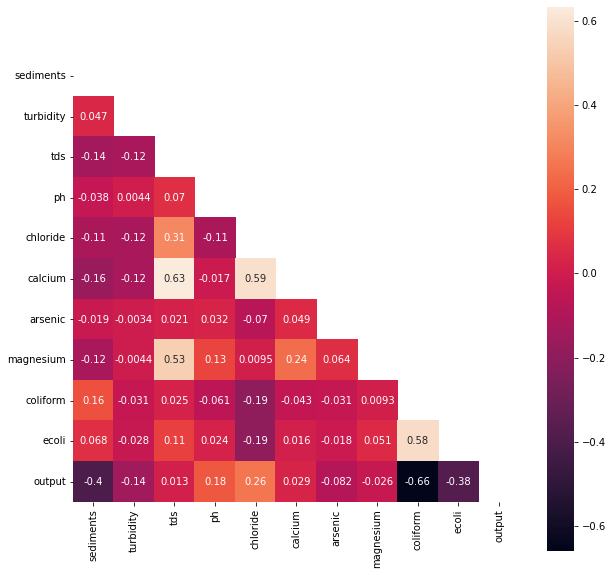

In [ ]:
correlation = watersample.corr()
upper_triangle = np.triu(correlation)
fig = plt.gcf()
fig.set_size_inches(10, 10)
sns.heatmap(data = correlation, mask = upper_triangle, square = True, annot = True)

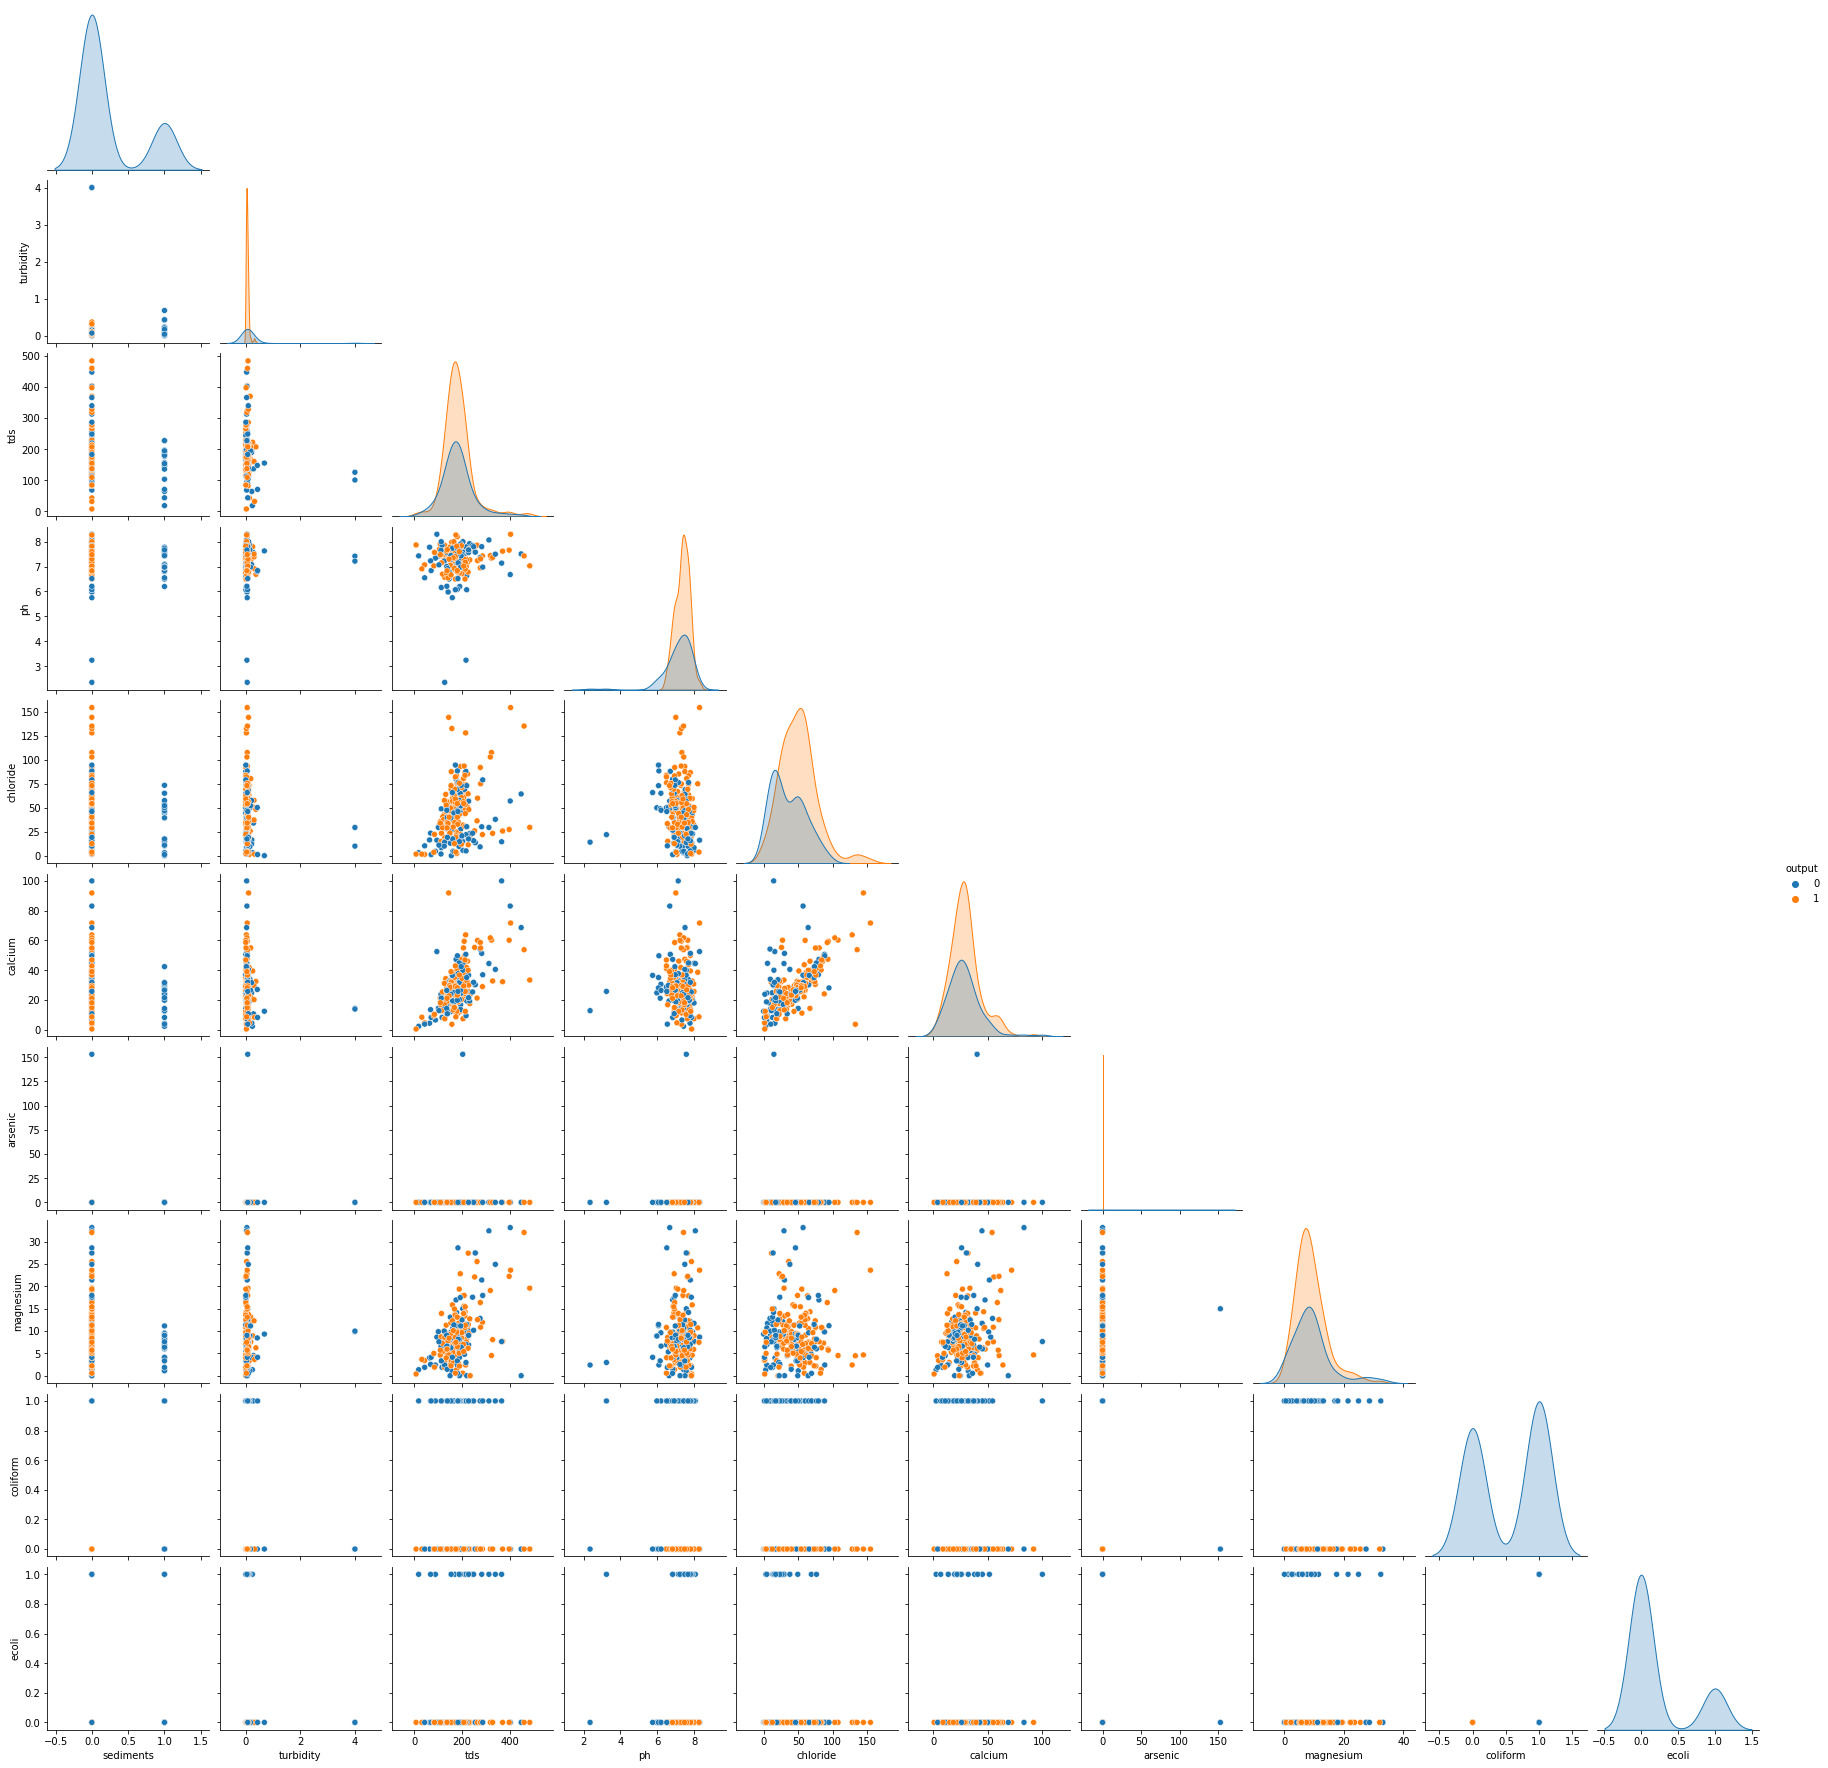

In [ ]:
sns.pairplot(data = watersample, hue = "output", corner = True)

In [ ]:
#Feature Selection
X = watersample.drop(['output'], axis = 1)
y = watersample["output"]
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.feature_selection import SelectKBest

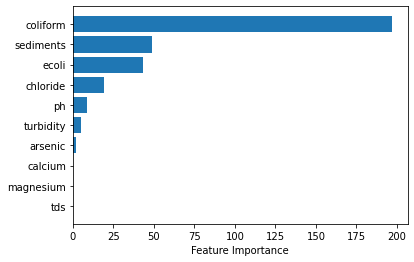

In [ ]:
selector = SelectKBest(k=8)
X_k_best = selector.fit_transform(X_scaled, y)
scores = selector.scores_
feature_importance = pd.DataFrame({"feature_name": X.columns, "score": scores})
feature_importance = feature_importance.sort_values(by = "score", ascending = True)
plt.barh(y = feature_importance["feature_name"], width = feature_importance["score"])
plt.xlabel('Feature Importance')
plt.show()

In [ ]:
df_fs=watersample.drop(columns=["calcium", "magnesium", "tds"])
df_fs.head()

,sediments,turbidity,ph,chloride,arsenic,coliform,ecoli,output
0,1,0.24,7.43,3.19,0.00,1,1,0
1,0,0.04,7.47,37.94,0.10,0,0,0
2,0,0.00,8.00,31.99,0.01,0,0,1
3,0,0.02,7.70,43.08,0.00,0,0,1
4,0,0.03,7.80,27.69,0.01,1,0,0


PCA

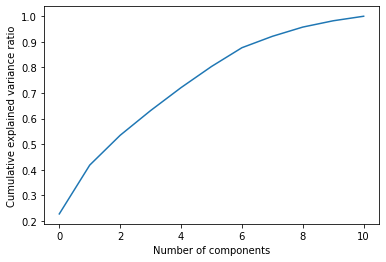

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()

#Fit the PCA model to the data
pca.fit(scaler.fit_transform(watersample))

#Calculate the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

#Plot the cumulative sum of the explained variance ratio
cumulative_sum = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_sum)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance ratio")
plt.show()

In [ ]:
from sklearn import preprocessing
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

In [ ]:
#Importing all the models
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb 
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
#Creating all the models

knn =KNeighborsClassifier()
svm_clf=svm.SVC()
rf=RandomForestClassifier()
models = [knn, svm_clf, rf]

In [ ]:
#Looping and looking for the best model
accuracies = []
train_accuracies = []
for model in models:

#You can also compute the accuracy using score method
  model.fit(X_scaled_train, y_train)
  cv_result = cross_validate(model, X_scaled_train, y_train, cv = 5, return_train_score = True)
  scores = cv_result["test_score"]
  train_score = cv_result["train_score"]
  train_accuracy = train_score.mean()
  accuracy = scores.mean()
  print(f"Accuracy of {model.__class__.__name__} is {accuracy}", f"Train score of {model.__class__.__name__} is {train_accuracy}")
  accuracies.append(accuracy)
  train_accuracies.append(train_accuracy)

Accuracy of KNeighborsClassifier is 0.9082462253193961 Train score of KNeighborsClassifier is 0.9347572106608251
Accuracy of SVC is 0.9082462253193959 Train score of SVC is 0.9408032128514057
Accuracy of RandomForestClassifier is 0.9903600464576074 Train score of RandomForestClassifier is 1.0


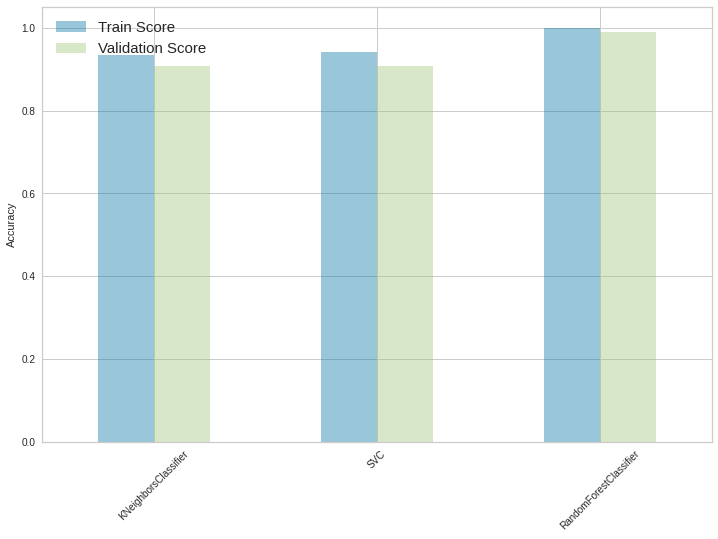

In [ ]:
model_names=["KNeighborsClassifier", "SVM", "RandomForestClassifier"]
df_accuracies = pd.DataFrame()
df_accuracies["model_names"] = model_names
df_accuracies["Train Score"] = train_accuracies
df_accuracies["Validation Score"] = accuracies
df_accuracies.plot(kind = 'bar', stacked = False, figsize = (12, 8), alpha = 0.4)

#bar1 = plt.bar(range(len(models)), accuracies, bar_width)
#bar2 = plt.bar(range(len(models)), train_accuracy, bar_width)

plt.xticks(range(len(models)), [clf.__class__.__name__ for clf in models], rotation = 45)
plt.ylabel("Accuracy")
plt.legend(fontsize = 15)
plt.show()

In [ ]:
#Hyperparameter Tuning
#Validation Curves

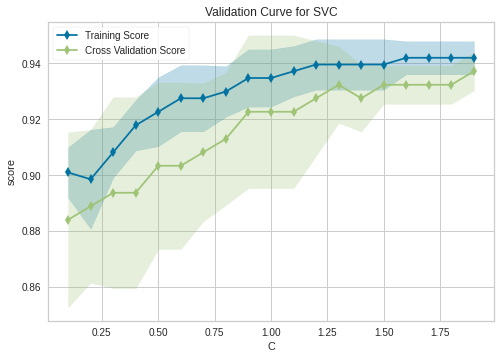

ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f070a13c610>,
                cv=3, estimator=SVC(), param_name='C',
                param_range=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                scoring='accuracy')

In [ ]:
from yellowbrick.model_selection import validation_curve
validation_curve(svm_clf, X_scaled_train, y_train, param_name = "C", param_range = np.arange(0.1, 2, 0.1), cv = 3, scoring = "accuracy")

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix ,ConfusionMatrixDisplay
svm_final=svm.SVC()
svm_final.fit(X_scaled_train,y_train)
y_pred_final = svm_final.predict(X_scaled_test)
print("Accuracy score: " + str(accuracy_score(y_test, y_pred_final)))

Accuracy score: 0.9230769230769231


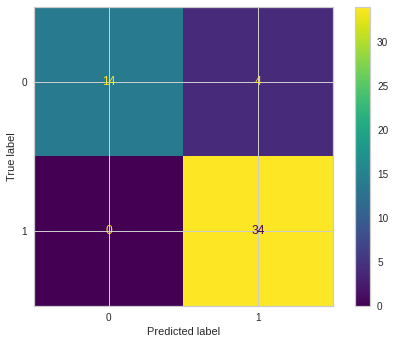

In [ ]:
cm = confusion_matrix(y_test, y_pred_final, labels = svm_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svm_clf.classes_)
disp.plot()
plt.show()

In [ ]:
print("\nClassification report:\n" + str(classification_report(y_test, y_pred_final)))


Classification report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        18
           1       0.89      1.00      0.94        34

    accuracy                           0.92        52
   macro avg       0.95      0.89      0.91        52
weighted avg       0.93      0.92      0.92        52

